In [ ]:
!unzip -q A.zip
!unzip -q B.zip
!unzip -q C.zip

replace for dataset A/FRESH_BLUE/D.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace for dataset B/FRESH_BLUE/M01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace for dataset C/FRESH_BLUE/D.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import shutil
import os

def zip_folder(folder_path):
    """Архивирует папку в ZIP с тем же именем (без /content/)"""
    folder_name = os.path.basename(folder_path)  # Получаем имя папки без пути
    zip_file_name = f"{folder_name}.zip"  # Добавляем .zip

    try:
        shutil.make_archive(zip_file_name[:-4], 'zip', folder_path)  # Создаём архив
        print(f"✅ Успешно архивировано: {folder_name} → {zip_file_name}")
    except Exception as e:
        print(f"❌ Ошибка при архивации: {e}")

# 🔹 Использование
folder_to_zip1 = "/content/runs"  # Укажи свою папку
zip_folder(folder_to_zip1)

❌ Ошибка при архивации: [Errno 2] No such file or directory: '/content/runs'


In [ ]:
import os
import shutil
import cv2

def reorganize_dataset(input_folder, output_folder):
    categories = {
        "FRESH": ["FRESH_GREEN", "FRESH_RED", "FRESH_BLUE"],
        "HALF": ["HALF_GREEN", "HALF_RED", "HALF_BLUE"],
        "SPOILT": ["SPOILT_GREEN", "SPOILT_RED", "SPOILT_BLUE"]
    }

    os.makedirs(output_folder, exist_ok=True)
    for category, subdirs in categories.items():
        category_path = os.path.join(output_folder, category)
        os.makedirs(category_path, exist_ok=True)

        for subdir in subdirs:
            subdir_path = os.path.join(input_folder, subdir)
            if not os.path.isdir(subdir_path):
                continue

            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename)
                if os.path.isfile(file_path):
                    new_filename = f"{subdir}_{filename}"
                    new_path = os.path.join(category_path, new_filename)
                    shutil.copy2(file_path, new_path)
                    print(f"Copied: {file_path} -> {new_path}")

def split_images(input_folder):
    tile_size = 50

    for category in os.listdir(input_folder):
        category_path = os.path.join(input_folder, category)
        if not os.path.isdir(category_path):
            continue

        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            if not filename.endswith(".png"):
                continue

            image = cv2.imread(file_path)
            if image is None or image.shape[:2] != (250, 250):
                continue

            base_name = os.path.splitext(filename)[0]

            for row in range(0, 250, tile_size):
                for col in range(0, 250, tile_size):
                    tile = image[row:row+tile_size, col:col+tile_size]
                    tile_filename = f"{base_name}_row{row//tile_size}_col{col//tile_size}.png"
                    tile_path = os.path.join(category_path, tile_filename)
                    cv2.imwrite(tile_path, tile)

            os.remove(file_path)
            print(f"Processed and removed: {file_path}")

# Пример использования
input_folder = "/content/for dataset C"  # Путь к папке с 9 подпапками
output_folder = "3categoryC"  # Путь к папке с 3 категориями
reorganize_dataset(input_folder, output_folder)
split_images(output_folder)

Copied: /content/for dataset C/FRESH_GREEN/P-delta.png -> 3categoryC/FRESH/FRESH_GREEN_P-delta.png
Copied: /content/for dataset C/FRESH_GREEN/M33.png -> 3categoryC/FRESH/FRESH_GREEN_M33.png
Copied: /content/for dataset C/FRESH_GREEN/M23.png -> 3categoryC/FRESH/FRESH_GREEN_M23.png
Copied: /content/for dataset C/FRESH_GREEN/M20.png -> 3categoryC/FRESH/FRESH_GREEN_M20.png
Copied: /content/for dataset C/FRESH_GREEN/D.png -> 3categoryC/FRESH/FRESH_GREEN_D.png
Copied: /content/for dataset C/FRESH_GREEN/M13.png -> 3categoryC/FRESH/FRESH_GREEN_M13.png
Copied: /content/for dataset C/FRESH_GREEN/M01.png -> 3categoryC/FRESH/FRESH_GREEN_M01.png
Copied: /content/for dataset C/FRESH_GREEN/P2.png -> 3categoryC/FRESH/FRESH_GREEN_P2.png
Copied: /content/for dataset C/FRESH_GREEN/M02.png -> 3categoryC/FRESH/FRESH_GREEN_M02.png
Copied: /content/for dataset C/FRESH_GREEN/M10.png -> 3categoryC/FRESH/FRESH_GREEN_M10.png
Copied: /content/for dataset C/FRESH_GREEN/psi.png -> 3categoryC/FRESH/FRESH_GREEN_psi.p

In [ ]:
import os
import shutil
import random

# Укажите путь к вашему исходному датасету
DATASET_PATH = "/content/3categoryC"
OUTPUT_PATH = "YOLOC_50"
CATEGORIES = ["FRESH", "HALF", "SPOILT"]
SPLIT_RATIO = 0.8  # 80% train, 20% val

# Функция для создания структуры папок
def create_dir_structure(base_path):
    for split in ["train", "val"]:
        for category in CATEGORIES:
            os.makedirs(os.path.join(base_path, split, category), exist_ok=True)

# Функция для разделения файлов на train и val
def split_dataset():
    create_dir_structure(OUTPUT_PATH)

    for category in CATEGORIES:
        img_path = os.path.join(DATASET_PATH, category)

        images = sorted([f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        random.shuffle(images)
        split_idx = int(len(images) * SPLIT_RATIO)

        train_imgs, val_imgs = images[:split_idx], images[split_idx:]

        for img in train_imgs:
            shutil.copy(os.path.join(img_path, img), os.path.join(OUTPUT_PATH, "train", category, img))

        for img in val_imgs:
            shutil.copy(os.path.join(img_path, img), os.path.join(OUTPUT_PATH, "val", category, img))

if __name__ == "__main__":
    split_dataset()
    print("Dataset successfully split into train/val with 80/20 ratio.")

Dataset successfully split into train/val with 80/20 ratio.


In [ ]:
!pip install ultralytics

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --verbose

Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import torch
print("CUDA доступен:", torch.cuda.is_available())
print("Количество GPU:", torch.cuda.device_count())
print("Название GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "GPU не найдена")

CUDA доступен: True
Количество GPU: 1
Название GPU: Tesla T4


In [ ]:
from ultralytics import YOLO
# Загрузите YOLOv8 модель для классификации
model = YOLO('yolo11m-cls.pt')  # Выберите базовую модель; можно взять и другие модели (s, m, l, x)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 22.4M/22.4M [00:00<00:00, 41.7MB/s]


In [ ]:
# Обучение
model.train(
    data='/content/YOLOC_50',
    epochs=200,               # больше эпох, так как изображения очень маленькие
    imgsz=50,               # размер изображений (10x10)
    batch=128,               # можно увеличить batch, так как картинки занимают мало памяти
    device='0',             # GPU ускорит обучение
    workers=1,              # уменьшить, если возникают ошибки загрузки
    optimizer='Adam',       # Adam лучше работает на маленьких данных
    lr0=0.001,              # маленький learning rate
    weight_decay=0.0001,    # L2-регуляризация
    augment=False,          # НЕ использовать аугментацию (иначе потеряется информация)
    rect=False,             # НЕ использовать rectangular training (может искажать пиксели)
    single_cls=False,       # у вас 3 класса (FRESH, HALF, SPOILT)
    dropout=0.1,            # небольшой dropout для регуляризации
)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=/content/YOLOC_50, epochs=200, time=None, patience=100, batch=128, imgsz=50, save=True, save_period=-1, cache=False, device=0, workers=1, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 5.35M/5.35M [00:00<00:00, 339MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[50] must be multiple of max stride 32, updating to [64]


train: Scanning /content/YOLOC_50/train... 4500 images, 0 corrupt: 100%|██████████| 4500/4500 [00:01<00:00, 2274.69it/s]

train: New cache created: /content/YOLOC_50/train.cache



val: Scanning /content/YOLOC_50/val... 1125 images, 0 corrupt: 100%|██████████| 1125/1125 [00:00<00:00, 2182.62it/s]


val: New cache created: /content/YOLOC_50/val.cache
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0002), 50 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 1 dataloader workers
Logging results to runs/classify/train
Starting training for 200 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/200      1.17G      1.242        128         64:  11%|█         | 4/36 [00:01<00:08,  4.00it/s]

      1/200      1.17G        1.2        128         64:  22%|██▏       | 8/36 [00:01<00:05,  5.04it/s]
100%|██████████| 755k/755k [00:00<00:00, 67.9MB/s]
      1/200      1.17G      1.029         20         64: 100%|██████████| 36/36 [00:08<00:00,  4.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.87it/s]

                   all      0.478          1



      Epoch    GPU_mem       loss  Instances       Size


      2/200      1.19G     0.8106         20         64: 100%|██████████| 36/36 [00:08<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all      0.632          1



      Epoch    GPU_mem       loss  Instances       Size


      3/200      1.21G     0.8523         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.61it/s]

                   all      0.645          1



      Epoch    GPU_mem       loss  Instances       Size


      4/200      1.24G     0.7909         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.24it/s]

                   all      0.713          1



      Epoch    GPU_mem       loss  Instances       Size


      5/200      1.27G     0.7591         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.02it/s]

                   all      0.679          1



      Epoch    GPU_mem       loss  Instances       Size


      6/200      1.29G     0.7616         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.94it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


      7/200      1.31G      0.721         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.09it/s]

                   all      0.756          1



      Epoch    GPU_mem       loss  Instances       Size


      8/200      1.34G     0.6713         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]

                   all      0.609          1



      Epoch    GPU_mem       loss  Instances       Size


      9/200      1.68G     0.6467         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.24it/s]

                   all      0.741          1



      Epoch    GPU_mem       loss  Instances       Size


     10/200       1.7G     0.6453         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.34it/s]

                   all      0.729          1



      Epoch    GPU_mem       loss  Instances       Size


     11/200      1.73G     0.6866         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.33it/s]

                   all      0.597          1



      Epoch    GPU_mem       loss  Instances       Size


     12/200      1.75G     0.6285         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.91it/s]

                   all      0.647          1



      Epoch    GPU_mem       loss  Instances       Size


     13/200      1.78G     0.6602         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.45it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


     14/200       1.8G       0.67         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.04it/s]

                   all       0.69          1



      Epoch    GPU_mem       loss  Instances       Size


     15/200      1.82G      0.701         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.11it/s]

                   all      0.583          1



      Epoch    GPU_mem       loss  Instances       Size


     16/200      1.85G     0.6564         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.16it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     17/200      1.87G     0.6763         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.66it/s]

                   all      0.765          1



      Epoch    GPU_mem       loss  Instances       Size


     18/200      2.21G     0.6669         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.89it/s]

                   all      0.691          1



      Epoch    GPU_mem       loss  Instances       Size


     19/200      2.24G     0.6815         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.04it/s]

                   all      0.668          1



      Epoch    GPU_mem       loss  Instances       Size


     20/200      2.26G     0.6936         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.79it/s]

                   all      0.714          1



      Epoch    GPU_mem       loss  Instances       Size


     21/200      2.29G     0.6474         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.27it/s]

                   all      0.773          1



      Epoch    GPU_mem       loss  Instances       Size


     22/200      2.31G     0.6174         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.01it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


     23/200      2.33G     0.5918         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.34it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


     24/200      2.36G     0.5753         20         64: 100%|██████████| 36/36 [00:06<00:00,  5.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.19it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


     25/200      2.38G     0.6581         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.38it/s]

                   all      0.751          1



      Epoch    GPU_mem       loss  Instances       Size


     26/200      2.41G      0.643         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.33it/s]

                   all      0.703          1



      Epoch    GPU_mem       loss  Instances       Size


     27/200      2.75G     0.6719         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.05it/s]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


     28/200      2.77G     0.6316         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.85it/s]

                   all      0.744          1



      Epoch    GPU_mem       loss  Instances       Size


     29/200      2.79G      0.597         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.16it/s]

                   all      0.796          1



      Epoch    GPU_mem       loss  Instances       Size


     30/200      2.82G     0.5711         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.20it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     31/200      2.84G     0.5749         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.86it/s]

                   all       0.79          1



      Epoch    GPU_mem       loss  Instances       Size


     32/200      2.87G     0.5675         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.13it/s]

                   all      0.801          1



      Epoch    GPU_mem       loss  Instances       Size


     33/200      2.89G     0.5862         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.79it/s]

                   all      0.739          1



      Epoch    GPU_mem       loss  Instances       Size


     34/200      2.92G     0.5514         20         64: 100%|██████████| 36/36 [00:06<00:00,  5.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.91it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     35/200      2.94G     0.5636         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.31it/s]

                   all      0.751          1



      Epoch    GPU_mem       loss  Instances       Size


     36/200      3.28G     0.5554         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.11it/s]

                   all      0.741          1



      Epoch    GPU_mem       loss  Instances       Size


     37/200       3.3G     0.5579         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.02it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


     38/200      3.33G     0.5541         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.09it/s]

                   all      0.713          1



      Epoch    GPU_mem       loss  Instances       Size


     39/200      3.35G      0.569         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.19it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


     40/200      3.38G     0.5674         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.91it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


     41/200       3.4G     0.5693         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.64it/s]

                   all      0.796          1



      Epoch    GPU_mem       loss  Instances       Size


     42/200      3.43G     0.5718         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.16it/s]

                   all      0.766          1



      Epoch    GPU_mem       loss  Instances       Size


     43/200      3.45G     0.5399         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.18it/s]

                   all      0.781          1



      Epoch    GPU_mem       loss  Instances       Size


     44/200      3.48G     0.5348         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.23it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


     45/200      3.81G     0.5143         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.97it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


     46/200      3.84G     0.5491         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.68it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     47/200      3.87G     0.5688         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]

                   all      0.775          1



      Epoch    GPU_mem       loss  Instances       Size


     48/200      3.89G     0.5669         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.62it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


     49/200      3.91G     0.5587         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.96it/s]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


     50/200      3.94G     0.5663         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.92it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


     51/200      3.96G     0.5455         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.74it/s]

                   all      0.739          1



      Epoch    GPU_mem       loss  Instances       Size


     52/200      3.99G     0.5541         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.10it/s]

                   all      0.643          1



      Epoch    GPU_mem       loss  Instances       Size


     53/200      4.01G     0.6383         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.96it/s]

                   all      0.811          1



      Epoch    GPU_mem       loss  Instances       Size


     54/200      4.04G     0.5102         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


     55/200      4.38G      0.538         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.30it/s]

                   all      0.728          1



      Epoch    GPU_mem       loss  Instances       Size


     56/200       4.4G     0.5186         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.10it/s]

                   all      0.752          1



      Epoch    GPU_mem       loss  Instances       Size


     57/200      4.42G     0.5147         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.47it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


     58/200      4.45G     0.5228         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.19it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


     59/200      4.47G     0.5624         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.86it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


     60/200       4.5G     0.4931         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.80it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


     61/200      4.52G     0.5022         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.50it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     62/200      4.55G     0.4907         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.05it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


     63/200      4.57G     0.5207         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.37it/s]

                   all      0.737          1



      Epoch    GPU_mem       loss  Instances       Size


     64/200      4.91G     0.5039         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all      0.809          1



      Epoch    GPU_mem       loss  Instances       Size


     65/200      4.93G      0.509         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.53it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


     66/200      4.96G     0.6123         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.69it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     67/200      4.98G     0.4777         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.05it/s]

                   all      0.796          1



      Epoch    GPU_mem       loss  Instances       Size


     68/200      5.01G     0.5152         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.88it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


     69/200      5.03G     0.5174         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.86it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     70/200      5.06G     0.4904         20         64: 100%|██████████| 36/36 [00:08<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.99it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


     71/200      5.08G     0.4969         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


     72/200      5.11G     0.4861         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.45it/s]

                   all      0.743          1



      Epoch    GPU_mem       loss  Instances       Size


     73/200      5.44G     0.4985         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.66it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     74/200      5.47G     0.4779         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.25it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     75/200      5.49G      0.504         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.41it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


     76/200      5.52G     0.4757         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.46it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


     77/200      5.54G     0.4726         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.00it/s]

                   all      0.777          1



      Epoch    GPU_mem       loss  Instances       Size


     78/200      5.57G     0.4826         20         64: 100%|██████████| 36/36 [00:07<00:00,  5.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.10it/s]

                   all      0.755          1



      Epoch    GPU_mem       loss  Instances       Size


     79/200      5.59G     0.4569         20         64: 100%|██████████| 36/36 [00:07<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.89it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


     80/200      5.62G     0.4684        128         64:  53%|█████▎    | 19/36 [00:04<00:04,  3.65it/s]

In [ ]:
!yolo task=classify mode=predict model=runs/classify/train/weights/best.pt source=/content/meatFreshnessP_YOLO/test

Found 1800 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.3440 - loss: 1.5765 - val_accuracy: 0.3422 - val_loss: 1.1635
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3468 - loss: 1.2766 - val_accuracy: 0.3556 - val_loss: 1.1671
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3522 - loss: 1.2134 - val_accuracy: 0.3578 - val_loss: 1.1064
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3623 - loss: 1.1461 - val_accuracy: 0.4022 - val_loss: 1.0956
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3522 - loss: 1.1268 - val_accuracy: 0.3600 - val_loss: 1.0971
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3535 - loss: 1.1166 - val_accuracy: 0.4022 - val_loss: 1.0917
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3631 - loss: 1.1017 - val_accuracy: 0.3311 - val_loss: 1.0903
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3540 - loss: 1.0923 - val_accuracy: 0.3978 - val_

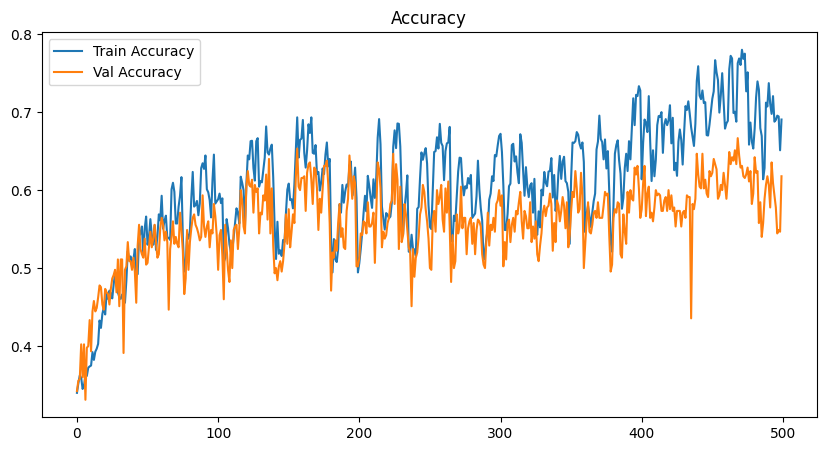

              precision    recall  f1-score   support

           0       0.62      0.49      0.55       128
           1       0.64      0.51      0.57       127
           2       0.44      0.66      0.53       105

    accuracy                           0.55       360
   macro avg       0.57      0.55      0.55       360
weighted avg       0.57      0.55      0.55       360



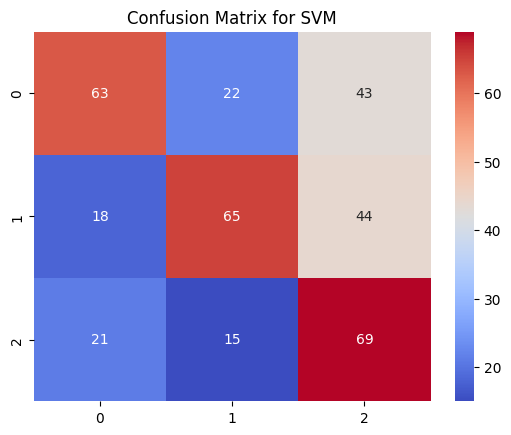

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Параметры
img_size = (50, 50)
batch_size = 128
epochs = 500

# Пути к данным
data_dir = "/content/YOLOA_501"
#train_dir = os.path.join(data_dir, "train")
#val_dir = os.path.join(data_dir, "val")
train_dir = "/content/YOLOA_501/train"
val_dir = "/content/YOLOA_501/val"

# Генераторы данных
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')

# Создание ANN
model = Sequential([
    Flatten(input_shape=(50, 50, 3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(3, activation='softmax')  # 3 класса
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

In [ ]:
import os

print("Train folders:", os.listdir(train_dir))
print("Val folders:", os.listdir(val_dir))



Train folders: ['.ipynb_checkpoints', 'HALF', 'SPOILT', 'FRESH']
Val folders: ['HALF', 'SPOILT', 'FRESH']


In [ ]:
rm -rf train/.ipynb_checkpoints val/.ipynb_checkpoints


In [ ]:
# Сохранение модели
model.save("meat_freshness_ann_1000.keras")

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("meat_freshness_ann_500.keras", monitor="val_accuracy", save_best_only=True, verbose=1)

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[checkpoint])


Epoch 1/500
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7152 - loss: 0.6396
Epoch 1: val_accuracy improved from -inf to 0.62222, saving model to meat_freshness_ann_500.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7134 - loss: 0.6415 - val_accuracy: 0.6222 - val_loss: 1.2450
Epoch 2/500
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7130 - loss: 0.6527
Epoch 2: val_accuracy improved from 0.62222 to 0.62444, saving model to meat_freshness_ann_500.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7125 - loss: 0.6551 - val_accuracy: 0.6244 - val_loss: 1.0883
Epoch 3/500
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7481 - loss: 0.6059
Epoch 3: val_accuracy improved from 0.62444 to 0.65333, saving model to meat_freshness_ann_500.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7478 - loss: 0.6063 - val_accuracy: 0.6533 - val_loss: 1.1167
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7482 - loss: 0.5912
Epoch 4:

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("meat_freshness_ann_500.keras")  # Загружаем сохраненную модель
history = model.fit(train_generator, epochs=500, validation_data=val_generator)  # Продолжаем обучение

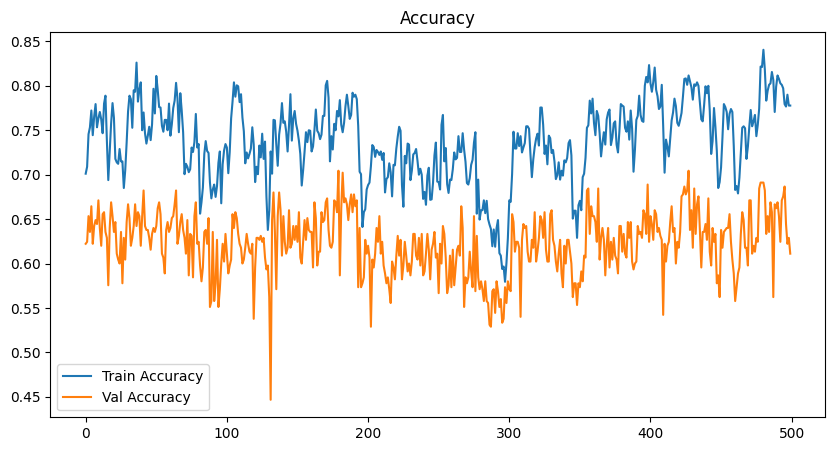

              precision    recall  f1-score   support

           0       0.62      0.49      0.55       128
           1       0.64      0.51      0.57       127
           2       0.44      0.66      0.53       105

    accuracy                           0.55       360
   macro avg       0.57      0.55      0.55       360
weighted avg       0.57      0.55      0.55       360



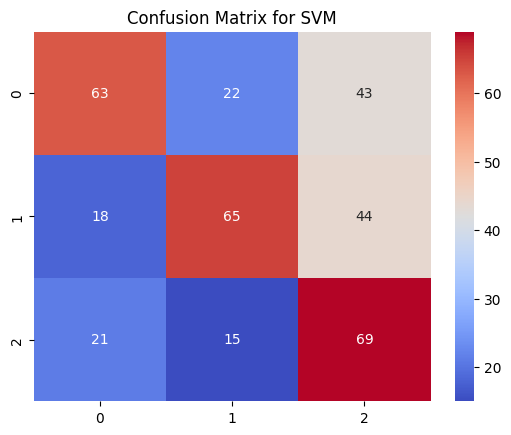

In [ ]:
# Графики обучения
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

# Подготовка данных для SVM
X, y = [], []
for folder in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, folder)
    label = train_generator.class_indices[folder]
    for file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, file)
        img = plt.imread(img_path)
        img = np.resize(img, (50, 50, 3))
        X.append(img.flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)

# Нормализация и разделение
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM классификатор
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Предсказание
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

# Матрица ошибок
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix for SVM")
plt.show()

In [ ]:
# Для SVM
from sklearn.metrics import accuracy_score

# Получение точности SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Для ANN
# Получаем максимальную точность из истории обучения
ann_train_accuracy = max(history.history['accuracy'])
ann_val_accuracy = max(history.history['val_accuracy'])

print(f"Max ANN Training Accuracy: {ann_train_accuracy * 100:.2f}%")
print(f"Max ANN Validation Accuracy: {ann_val_accuracy * 100:.2f}%")


SVM Accuracy: 54.72%
Max ANN Training Accuracy: 84.06%
Max ANN Validation Accuracy: 70.44%


In [ ]:
import cv2

X, y = [], []
for folder in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, folder)
    label = train_generator.class_indices[folder]
    for file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, file)
        img = cv2.imread(img_path)  # Используем OpenCV
        img = cv2.resize(img, (50, 50))  # Корректное изменение размера
        img = img.flatten()  # Преобразуем в вектор
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение SVM
svm_model = SVC(kernel='rbf')  # Вместо 'linear'
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')  # Три класса
])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       127
           1       0.60      0.53      0.57       105
           2       0.70      0.57      0.63       128

    accuracy                           0.63       360
   macro avg       0.63      0.62      0.62       360
weighted avg       0.64      0.63      0.62       360



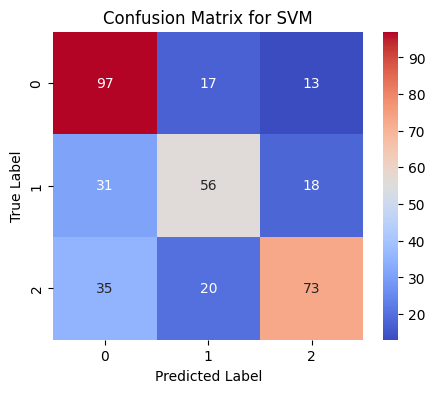

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Пути к данным
train_dir = "/content/YOLOA_50/train"

# Параметры
img_size = (50, 50)

# Чтение изображений и подготовка данных
X, y = [], []
class_labels = sorted(os.listdir(train_dir))  # Получаем список классов
label_dict = {label: i for i, label in enumerate(class_labels)}  # Словарь классов

for folder in class_labels:
    class_dir = os.path.join(train_dir, folder)
    if not os.path.isdir(class_dir):
        continue  # Пропускаем не-папки
    label = label_dict[folder]  # Получаем числовой класс
    for file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, file)
        img = load_img(img_path, target_size=img_size)  # Изменяем размер
        img_array = img_to_array(img) / 255.0  # Нормализация
        X.append(img_array.flatten())  # Преобразуем в одномерный массив
        y.append(label)

# Преобразование в numpy массивы
X = np.array(X)
y = np.array(y)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Оптимизация параметров SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_svm = grid_search.best_estimator_
print(f"Best SVM Parameters: {grid_search.best_params_}")

# Оценка модели
y_pred = best_svm.predict(X_test)
print(classification_report(y_test, y_pred))

# Матрица ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib

def load_images_from_folder(folder):
    X, y = [], []
    class_map = {'FRESH': 0, 'HALF': 1, 'SPOILT': 2}
    for label in class_map:
        class_path = os.path.join(folder, label)
        if not os.path.exists(class_path):
            continue
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert('L').resize((50, 50))  # Преобразуем в градации серого
            img_array = np.array(img)
            hog_features = hog(img_array, pixels_per_cell=(4, 4), cells_per_block=(2, 2), feature_vector=True, orientations=9)
            X.append(hog_features)
            y.append(class_map[label])
    return np.array(X), np.array(y)

# Загружаем данные
train_path = '/content/YOLOA_50/train'
val_path = '/content/YOLOA_50/val'
X_train, y_train = load_images_from_folder(train_path)
X_val, y_val = load_images_from_folder(val_path)

# Нормализация
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Снижение размерности через PCA
pca = PCA(n_components=50)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

# Обучение SVM
svm_model = SVC(kernel='rbf', C=3, gamma='scale')
svm_model.fit(X_train, y_train)

# Оценка модели
y_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# Сохранение модели
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

Validation Accuracy: 0.6889


['pca.pkl']

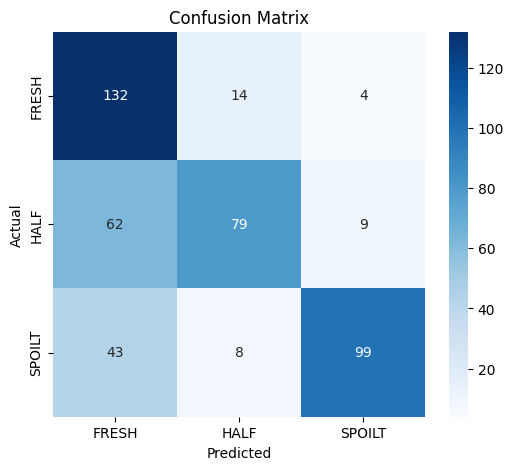

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FRESH', 'HALF', 'SPOILT'], yticklabels=['FRESH', 'HALF', 'SPOILT'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Found 4500 images belonging to 3 classes.
Found 1125 images belonging to 3 classes.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.4664 - loss: 1.0704 - val_accuracy: 0.6196 - val_loss: 0.8653
Epoch 2/50
  1/140 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5312 - loss: 0.9518

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5312 - loss: 0.9518 - val_accuracy: 0.6232 - val_loss: 0.8641
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.6075 - loss: 0.8717 - val_accuracy: 0.6205 - val_loss: 0.8091
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6250 - loss: 0.9039 - val_accuracy: 0.6170 - val_loss: 0.8101
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6435 - loss: 0.8162 - val_accuracy: 0.6286 - val_loss: 0.7883
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6875 - loss: 0.7140 - val_accuracy: 0.6277 - val_loss: 0.7883
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.6298 - loss: 0.8105 - val_accuracy: 0.6286 - val_loss: 0.8057
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6250 - loss: 0.7651 - val_accuracy: 0.6295 - val_loss: 0.8055
Epoch 9/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.6635 - loss: 0.7705 - val_accuracy: 0.6402 

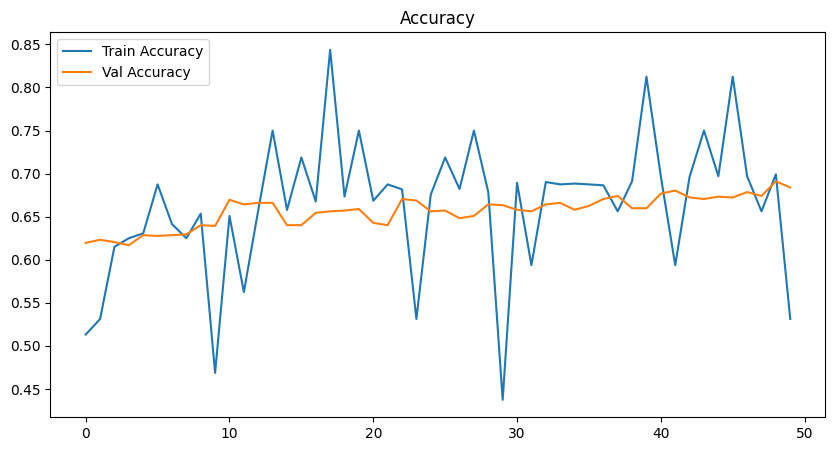

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━

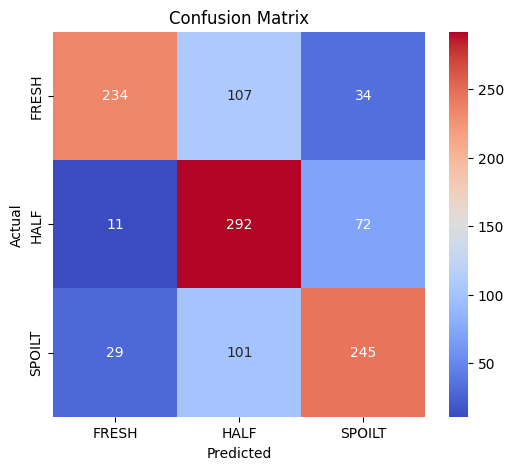

In [ ]:
# CNN
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# 1. Подготовка данных с использованием ImageDataGenerator
img_width, img_height = 50, 50
batch_size = 32
train_dir = '/content/YOLOC_50/train'
val_dir = '/content/YOLOC_50/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# 2. Создание модели CNN
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)

# 3. Графики обучения
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

# 4. Матрица ошибок
val_labels = []
val_preds = []
for i in range(len(validation_generator)):
    x_batch, y_batch = validation_generator[i]
    preds = model.predict(x_batch)
    val_preds.extend(np.argmax(preds, axis=1))
    val_labels.extend(np.argmax(y_batch, axis=1))

conf_matrix = tf.math.confusion_matrix(val_labels, val_preds).numpy()
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Сохранение модели
model.save('cnn_model.h5')